**Phần 1: Tải và Kiểm tra dữ liệu**

In [ ]:
import pandas as pd
try:
    # Đảm bảo đường dẫn chính xác và sử dụng dấu gạch chéo xuôi (/)
    file_path = "data_dotquy.csv"
    
    # Đọc dữ liệu từ CSV vào DataFrame
    df = pd.read_csv(file_path)
    
    # Hiển thị DataFrame
    print(df)
    
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy tệp tại đường dẫn: {file_path}. Vui lòng kiểm tra lại vị trí và tên tệp.")

In [44]:
# Kiểm tra trùng lặp
duplicated_rows = df[df.duplicated(subset='id')]
print("So luong du lieu trung lap la:" , len(duplicated_rows))

# Xóa dữ liệu nếu thiếu
# df = df.dropna()
# df = df.applymap(lambda x: x.replace("\n"," ") if isinstance(x, str) else x )

So luong du lieu trung lap la: 0


In [45]:
# iểm tra dữ liệu có bị thiếu
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Phần 2: Tiền xử lý dữ liệu**

In [46]:
# Dùng knn điền dữ liệu thiếu vào BMI
# Tạo đối tượng KNN Imputer với số lượng hàng xóm là 3
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Áp dụng imputer cho DataFrame, chỉ chọn các cột số
df[['age', 'bmi']] = imputer.fit_transform(df[['age', 'bmi']])

# Hiển thị DataFrame sau khi điền dữ liệu
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [47]:
# Kiểm tra lại đã dủ dữ liệu chưa
df['bmi'].isnull().sum()
df['bmi']

0       36.600000
1       28.866667
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    26.733333
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [48]:
# Xóa cột mã định danh (Không có giá trị)
df  = df.drop(columns=['id'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [49]:
# Loại bỏ giới tính mang giá trị Other (tránh nhiễu)
mask = df['gender'].isin(['Male', 'Female'])
df = df[mask]
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

In [50]:
# gender: female 1 male 0 (Mẫ Hóa)
df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})
print(df)

     gender   age  hypertension  heart_disease ever_married      work_type  \
0         0  67.0             0              1          Yes        Private   
1         1  61.0             0              0          Yes  Self-employed   
2         0  80.0             0              1          Yes        Private   
3         1  49.0             0              0          Yes        Private   
4         1  79.0             1              0          Yes  Self-employed   
...     ...   ...           ...            ...          ...            ...   
5105      1  80.0             1              0          Yes        Private   
5106      1  81.0             0              0          Yes  Self-employed   
5107      1  35.0             0              0          Yes  Self-employed   
5108      0  51.0             0              0          Yes        Private   
5109      1  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_sta

C:\Users\dinhn\AppData\Local\Temp\ipykernel_7032\2602974307.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


In [51]:
# Kiểm tra xem tuổi có phải là số nguyên hay không
df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())

# Lọc các hàng mà tuổi không phải là số thực (chỉ giữ lại số nguyên)
df = df[df['Is_Whole_Number']]

# Xóa cột tạm thời 'Is_Whole_Number'
df = df.drop(columns=['Is_Whole_Number'])

df

C:\Users\dinhn\AppData\Local\Temp\ipykernel_7032\803123969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [52]:
# Chuẩn hóa bằng Min-Max Scaling
# Chuẩn hóa cột age về khoảng giá trị [0, 1] bằng phương pháp Min-Max Scaling. Điều này giúp mô hình học máy hoạt động tốt hơn.
# Calculate min and max values
X_min = min(df['age'])
X_max = max(df['age'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['age']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['age'] = scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [53]:
# Chuyển trạng thái đã kết hôn về dạng 1 và chưa kết hôn về dạng 0
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,Private,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


In [54]:
# Chuẩn hóa cột avg_glucose_level (mức đường huyết trung bình) về khoảng [0, 1] dùng Min-Max Scaling (Mã hóa & Chuẩn hóa)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['work_type'] = label_encoder.fit_transform(df['work_type'])

# sử dụng chuẩn hóa bằng Min-Max Scaling chuan hoa df['work_type'] dang (0 1 2 3 4)
# Calculate min and max values
X_min = min(df['work_type'])
X_max = max(df['work_type'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['work_type']]
scaled_data
# Tạo ra trường dữ liệu mới work_type_2
df['work_type'] =scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,1,0.50,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,1,0.75,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,Rural,166.29,25.600000,formerly smoked,0


In [55]:
# Chuyển trạng thái thành thị về dạng 1 và nông thôn về dạng 0
df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})


C:\Users\dinhn\AppData\Local\Temp\ipykernel_7032\835445198.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})


In [56]:
# Chuẩn hóa cột avg_glucose_level (mức đường huyết trung bình) về khoảng [0, 1] dùng Min-Max Scaling
glucose_values = df['avg_glucose_level']

# Calculate min and max values
X_min = min(df['avg_glucose_level'])
X_max = max(df['avg_glucose_level'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['avg_glucose_level']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['avg_glucose_level'] = scaled_data
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,28.866667,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,26.733333,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,25.600000,formerly smoked,0


In [57]:
# Chuẩn hóa cột bmi về khoảng [0, 1]
# Dữ liệu ban đầu
data = df['bmi']

# Min-Max Scaling
data_min = data.min()
data_max = data.max()

scaled_data = (data - data_min) / (data_max - data_min)

# Hiển thị dữ liệu đã chuẩn hóa
print(scaled_data)

0       0.293163
1       0.203553
2       0.245655
3       0.267671
4       0.147161
          ...   
5105    0.178834
5106    0.332561
5107    0.223638
5108    0.165701
5109    0.172654
Name: bmi, Length: 4994, dtype: float64


In [58]:
# Gán lại dữ liệu vào cột ['bmi']
df['bmi']=scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.178834,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,0.165701,formerly smoked,0


In [59]:

# Dữ liệu ban đầu
data = df['bmi']

# Chuyển đổi dữ liệu thành DataFrame
dff = pd.DataFrame(data, columns=['bmi'])
dff

,bmi
0,0.293163
1,0.203553
2,0.245655
3,0.267671
4,0.147161
...,...
5105,0.178834
5106,0.332561
5107,0.223638
5108,0.165701


In [60]:
# Xóa các hàng mà tất cả các cột đều trống (dòng rỗng).
df.dropna(how='all', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1


In [61]:
# Lọc bỏ các dòng mà cột smoking_status (tình trạng hút thuốc) có giá trị là 'Unknown' (tăng độ sạch)
df = df[df['smoking_status'] != 'Unknown']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,0.691358,0,0,1,0.50,0,0.105300,0.120510,never smoked,0
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.178834,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0


In [62]:
# Mã hóa có trọng số sang dạng số với quy ước cụ thể
map_smoking_status = {
    'never smoked': 0,
    'formerly smoked': 0.5,
    'smokes': 1
}

df['smoking_status'] = df['smoking_status'].map(map_smoking_status)

print(df)

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0  0.814815             0              1             1       0.50   
1         1  0.740741             0              0             1       0.75   
2         0  0.975309             0              1             1       0.50   
3         1  0.592593             0              0             1       0.50   
4         1  0.962963             1              0             1       0.75   
...     ...       ...           ...            ...           ...        ...   
5102      1  0.691358             0              0             1       0.50   
5105      1  0.975309             1              0             1       0.50   
5106      1  0.987654             0              0             1       0.75   
5107      1  0.419753             0              0             1       0.75   
5108      0  0.617284             0              0             1       0.50   

      Residence_type  avg_glucose_level       bmi  

C:\Users\dinhn\AppData\Local\Temp\ipykernel_7032\1300236330.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map(map_smoking_status)


In [63]:
# Xuất dl sau khi tiền sử lý
# df.to_csv('sauxuly.csv', index=False)

**Phần 3: Trực quan hóa dữ liệu**

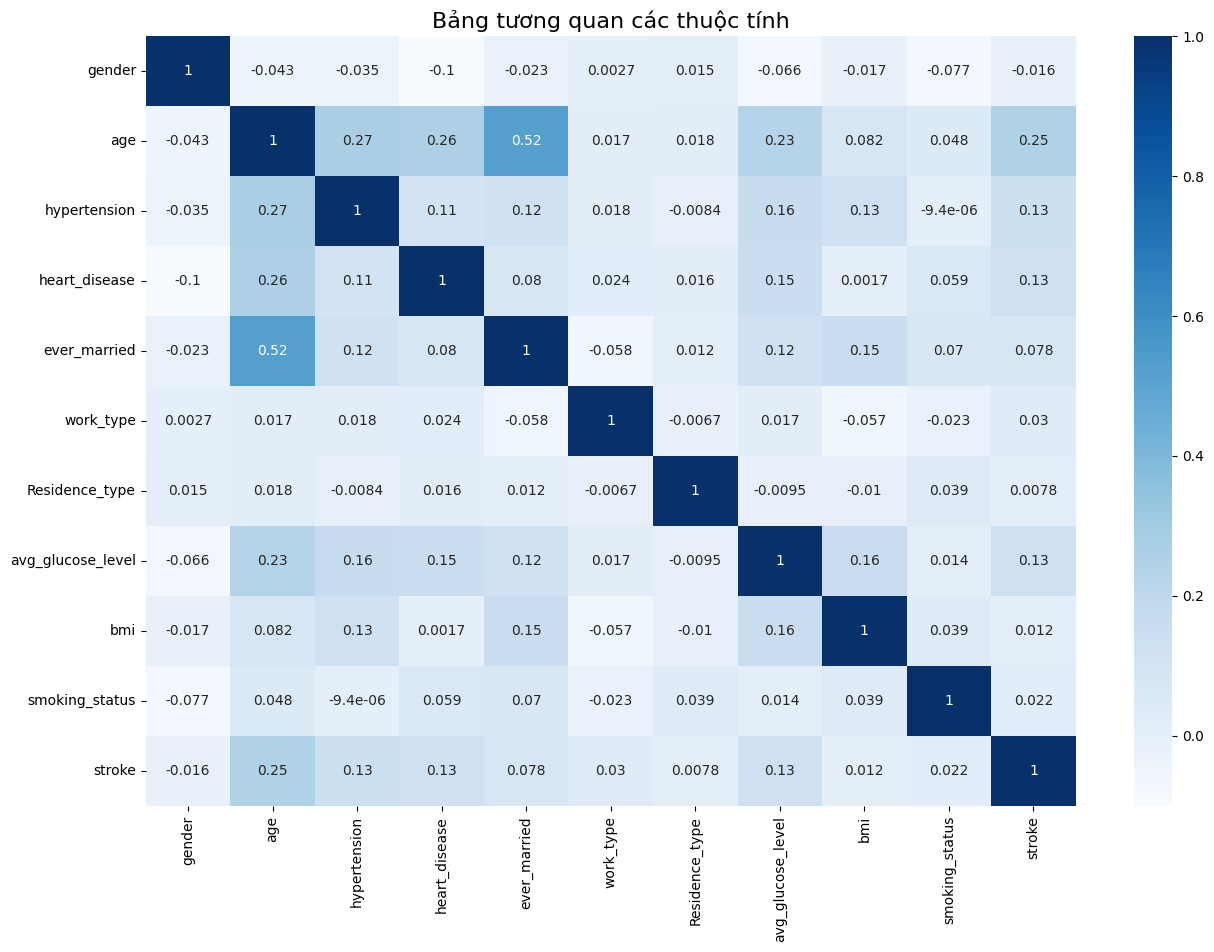

In [64]:
# Trực quan hóa dữ liệu bằng biểu đồ nhiệt
# thể hiện độ tương quan (Correlation) giữa tất cả các thuộc tính trong bảng. Màu càng đậm thì mối tương quan càng mạnh
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_df = df.select_dtypes(include=[np.number])

corr = df.corr()
# plt.figure(figsize=(15,10))
# plt.title("Bảng tương quan các thuộc tính", frontsize = 16)
# sns.heatmap(corr, annot= True, cmap="Blues")

plt.figure(figsize=(15, 10))
plt.title("Bảng tương quan các thuộc tính", fontsize=16)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

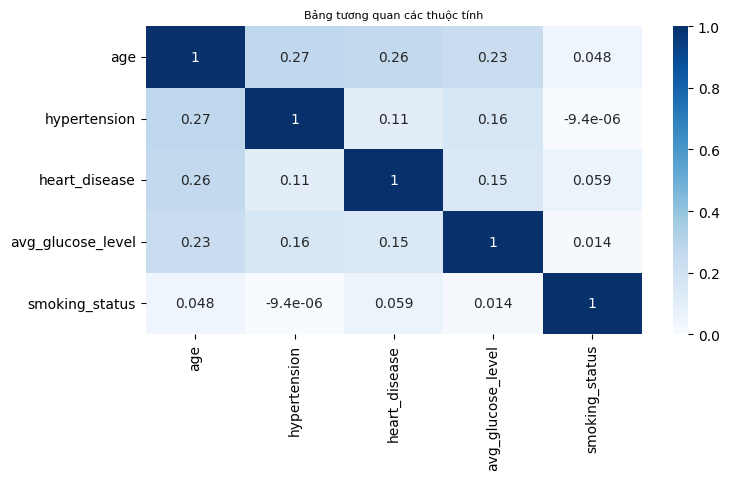

In [65]:
#Vẽ Heatmap nhưng chỉ tập trung vào các yếu tố chính ảnh hưởng đến đột quỵ như: [ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status']
# Các yếu tố chính ảnh hưởng đến dột quỵ
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#numeric_df = df.select_dtypes(include=[np.number])

corr = df[[ 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status']].corr()
# plt.figure(figsize=(15,10))
# plt.title("Bảng tương quan các thuộc tính", frontsize = 16)
# sns.heatmap(corr, annot= True, cmap="Blues")

plt.figure(figsize=(8, 4))
plt.title("Bảng tương quan các thuộc tính", fontsize=8)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**Phần 4: Cân bằng dữ liệu**

In [66]:
# Dữ liệu đột quỵ thường bị mất cân bằng (người không bị bệnh > hơn người bị bệnh)
# Kết hợp cả Oversampling và Undersampling để cân bằng dữ liệu 
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Tách dữ liệu thành các biến đặc trưng (X) và biến mục tiêu (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các đối tượng Oversampling và Undersampling
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Tự động sinh thêm dữ liệu giả lập cho lớp bị thiếu (người bị đột quỵ)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Giảm bớt dữ liệu của lớp đa số.

# Tạo Pipeline kết hợp Oversampling và Undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Áp dụng pipeline trên dữ liệu huấn luyện
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Kiểm tra kích thước của dữ liệu sau khi cân bằng
print("Kích thước dữ liệu huấn luyện sau khi cân bằng:")
print(f"X_resampled: {X_resampled.shape}")
print(f"y_resampled: {y_resampled.shape}")

# Xem số lượng mẫu trong mỗi lớp sau khi cân bằng
print("Số lượng mẫu trong từng lớp sau khi cân bằng:")
print(y_resampled.value_counts())

# Kết hợp lại X_resampled và y_resampled để tạo thành một DataFrame hoàn chỉnh
df = pd.DataFrame(X_resampled, columns=X.columns)
df['stroke'] = y_resampled

# Xem trước dữ liệu sau khi cân bằng
df

Kích thước dữ liệu huấn luyện sau khi cân bằng:
X_resampled: (3037, 10)
y_resampled: (3037,)
Số lượng mẫu trong từng lớp sau khi cân bằng:
stroke
0    1687
1    1350
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1403,1.0,0.580247,0,0,1,0.500000,0,0.202890,0.125145,0.000000,0
1277,0.0,0.691358,0,0,1,0.500000,1,0.241760,0.210892,0.000000,0
1156,0.0,0.790123,0,0,1,0.500000,0,0.663466,0.253766,0.500000,0
845,0.0,0.543210,0,0,1,0.500000,0,0.014449,0.147161,1.000000,0
1286,1.0,0.456790,0,0,1,0.500000,0,0.225787,0.417149,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4045,1.0,0.978232,1,0,1,0.690804,0,0.089500,0.206135,0.000000,1
4046,0.0,0.970272,0,1,1,0.000000,0,0.367507,0.169909,0.000000,1
4047,1.0,0.825553,0,0,1,0.637080,1,0.238546,0.261273,0.500000,1
4048,1.0,0.851852,0,1,1,0.500000,0,0.125713,0.234142,0.436006,1


In [67]:
# xem số người bị đột quỵ trong bảng
dfff = df[df['stroke'] == 1]
print("Số người bị đột quỵ là " ) 
len(dfff)

Số người bị đột quỵ là 


1350

In [68]:
# xem số người KHÔNG bị đột quỵ trong bảng
dfff = df[df['stroke'] == 0]
print("Số người KHÔNG bị đột quỵ là " ) 
len(dfff)

Số người KHÔNG bị đột quỵ là 


1687

In [69]:
dfff = df[df['stroke'] == 0]
len(dfff)

1687

**Phần 5: Xây dựng mô hình học máy**

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       546
           1       0.72      0.81      0.76       366

    accuracy                           0.80       912
   macro avg       0.79      0.80      0.79       912
weighted avg       0.80      0.80      0.80       912



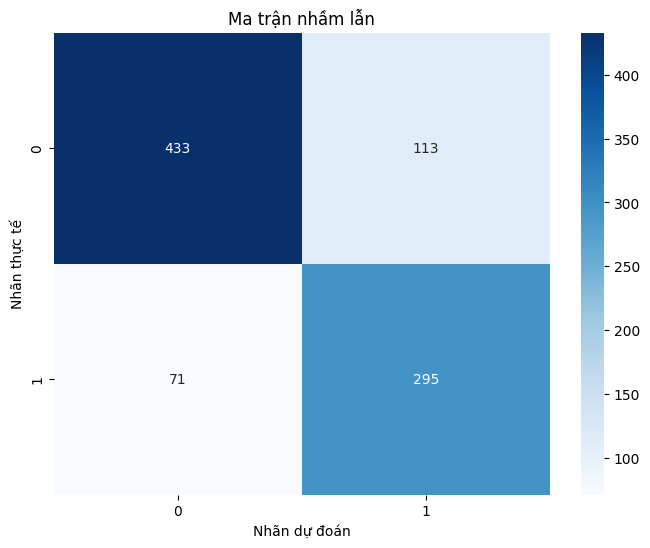

In [70]:
# Mô hình 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']
# Chia dữ liệu thành tập (7/3) huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(random_state= 10000)

clf.fit(X_train, y_train)

#Dự đoán
from sklearn.metrics import classification_report, confusion_matrix

# Dự đoán trên tập dữ liệu kiểm thử
y_pred = clf.predict(X_test)

# In báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(de_model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = de_model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)
    
    # Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(best_rf, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    y_pred = best_rf.predict(X_test)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(clf, X_test, y_test)

In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
import numpy as np

# Giả sử df là DataFrame chứa dữ liệu của bạn
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']

# Tăng cường dữ liệu bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Sử dụng Bayesian Optimization để tìm kiếm siêu tham số tốt nhất
param_dist = {
    'n_estimators': (100, 1000),
    'max_depth': (5, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'bootstrap': [True, False]
}

bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_

# Tạo mô hình với siêu tham số tốt nhất
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Huấn luyện mô hình
best_rf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = best_rf.predict(X_test)

# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print("Độ chính xác của mô hình Random Forest là: ", best_rf.score(X_test, y_test)*100, "%")

# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(best_rf, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    y_pred = best_rf.predict(X_test)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(best_rf, X_test, y_test)


KeyboardInterrupt: 